In [ ]:
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
# Function to divide the data into training and testing
import random
random.seed(22)
def separate_data():
    train_A = iris_dataset[0:40]
    test_A = iris_dataset[40:50]
    train_B = iris_dataset[50:90]
    test_B = iris_dataset[90:100]
    train_C = iris_dataset[100:140]
    test_C = iris_dataset[140:150]
    train = np.concatenate((train_A,train_B,train_C))
    test =  np.concatenate((test_A,test_B,test_C))
    return train,test
  

In [ ]:
iris_dataset = np.column_stack((iris_data.data,iris_data.target))

In [ ]:
iris_dataset = list(iris_dataset)
#print(len(iris_dataset)) #150
#print(len(iris_dataset[0]))#5
random.shuffle(iris_dataset) # Shuffle a list (reorganize the order of the list items), shuffle changes the original list, it does not return a new list.
Filetrain, Filetest = separate_data()

X_train = np.array([i[:4] for i in Filetrain]) # get only the 0 to 3 four features, excluding label, 120 examples R4
y_train = np.array([i[4] for i in Filetrain]) # only get the label , 120 examples of 0,1,2 labels R1
X_test = np.array([i[:4] for i in Filetest]) # 30 examples R4
y_test = np.array([i[4] for i in Filetest]) # 30 examples R1


In [ ]:
# Function to compute the euclidean distance
def distance_euclidean(p1,p2):
    squared_difference = 0.0
    for i in range(len(p1)):
        squared_difference += (p1[i] - p2[i])**2
    final_distance = squared_difference**0.5
    return final_distance

In [ ]:
# instead of changing the distance fct in this fct, we add another input param p to define the distance type.
def fit(test_sample,training_set,training_labels,k,p):
    distances = []
    # computing distances for all data points with respect to TEST SAMPLE
    for i in range(len(training_set)):
        distance_to_point = minkowski_distance(test_sample,training_set[i],p)
        distances.append([distance_to_point,training_set[i],training_labels[i]])

    # sort the distances
    distances.sort(key = lambda x : x[0]) # x[0] are the distances to point 

    # find the k nearest neighbors according to the distances
    k_nearest_neighbors = distances[0:k]

    # getting class with majority voting
    label_counts = {}
    for i in range(0,k):
        closest_label = k_nearest_neighbors[i][2] # the 2 corresponds to the training_lebels associated
        if (closest_label in label_counts) == True:
            label_counts[closest_label] += 1
        else:
            label_counts[closest_label] = 1 # first iter, false so the item (e.g. 1? if closest_label = 1)  is 1, next time it encouters 1, it increments
    labelCounts = list(label_counts.values())
    classes = list(label_counts.keys())
    y_pred = classes[labelCounts.index(max(labelCounts))] # get the prediction by using the most votes

    return (k_nearest_neighbors,y_pred)
      

In [ ]:
#### sort ####
xt = []
xt.append([10,[1,2,3,4],2])
xt.append([3,[4,3,2,1],1])
print(xt)
xt.sort(key = lambda x : x[0])
print(xt)
print(xt[0][1])

[[10, [1, 2, 3, 4], 2], [3, [4, 3, 2, 1], 1]]
[[3, [4, 3, 2, 1], 1], [10, [1, 2, 3, 4], 2]]
[4, 3, 2, 1]


In [ ]:
### try to get the class ####
dist = [[1,[1,2,3,4],1],[2,[2,3,4,5],2],[5,[8,9,10,11],2]]
knn = dist[0:2]
knn
lb_ct = {}
for i in range(0,2):
  cl = knn[i][2]
  if (cl in lb_ct) == True:
      lb_ct[cl] += 1
  else:
      lb_ct[cl] = 1
print(lb_ct)
print(type(lb_ct))
print(lb_ct.values())
print(lb_ct.keys())

{1: 1, 2: 1}
<class 'dict'>
dict_values([1, 1])
dict_keys([1, 2])


In [ ]:
k = 3
print(f'Test sample predictions for k={k} \t')
print('*********************************')

for i in range(len(X_test)):
    
    neighbors, pred_label = fit(X_test[i],X_train,y_train,k,2)

    if (pred_label == y_test[i]):
        print(f'test sample:{X_test[i]} \t', f'predicted label:{pred_label} \t',
              f'true label:{y_test[i]} \t', "Correctly classified")
    else:
        print(f'test sample:{X_test[i]} \t', f'predicted label:{pred_label} \t',
              f'true label:{y_test[i]} \t', "Misclassified")


Test sample predictions for k=3 	
*********************************
test sample:[5.1 3.8 1.9 0.4] 	 predicted label:0.0 	 true label:0.0 	 Correctly classified
test sample:[6.3 2.3 4.4 1.3] 	 predicted label:1.0 	 true label:1.0 	 Correctly classified
test sample:[6.5 3.  5.5 1.8] 	 predicted label:2.0 	 true label:2.0 	 Correctly classified
test sample:[6.7 2.5 5.8 1.8] 	 predicted label:2.0 	 true label:2.0 	 Correctly classified
test sample:[6.2 2.9 4.3 1.3] 	 predicted label:1.0 	 true label:1.0 	 Correctly classified
test sample:[7.2 3.2 6.  1.8] 	 predicted label:2.0 	 true label:2.0 	 Correctly classified
test sample:[4.4 2.9 1.4 0.2] 	 predicted label:0.0 	 true label:0.0 	 Correctly classified
test sample:[6.1 2.9 4.7 1.4] 	 predicted label:1.0 	 true label:1.0 	 Correctly classified
test sample:[7.1 3.  5.9 2.1] 	 predicted label:2.0 	 true label:2.0 	 Correctly classified
test sample:[4.7 3.2 1.3 0.2] 	 predicted label:0.0 	 true label:0.0 	 Correctly classified
test sample:

In [ ]:
def accuracy(pred_label,true_label):
    TP = 0
    for i in range(len(pred_label)):
        if(pred_label[i] == true_label[i]):
            TP += 1
    accuracy = (TP/len(pred_label))
    return accuracy

For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 96.67% 
For k = 5, Accuracy 96.67% 
For k = 7, Accuracy 96.67% 
For k = 9, Accuracy 96.67% 
For k = 11, Accuracy 96.67% 
For k = 13, Accuracy 100.00% 
For k = 15, Accuracy 100.00% 
For k = 17, Accuracy 96.67% 
For k = 19, Accuracy 96.67% 
For k = 21, Accuracy 96.67% 
For k = 23, Accuracy 96.67% 
For k = 25, Accuracy 96.67% 
For k = 27, Accuracy 96.67% 
For k = 29, Accuracy 96.67% 


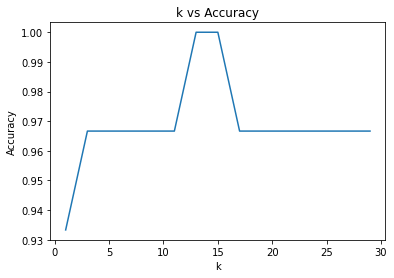

In [ ]:
accuracy_list = []
k_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbors, pred_label = fit(test_instance,X_train,y_train,k,2)
        y_pred.append(pred_label)
    acc = accuracy(y_pred,y_test)
    print("For k = {}, Accuracy {:2.2%} ".format(k,acc))
    accuracy_list.append(acc)

plt.plot(k_list,accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
h = .02 # step size in the mesh

# create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def decision_boundary(k):
    # For better data visualization we consider only the first two features (petal length and sepal length) in the dicision boundary plot
    X = np.concatenate((X_train,X_test))
    X = X[:,:2] # only take the first 2 dims
    y = np.concatenate((y_train,y_test))

    # Plot the dicision boundary. For that, we will assign a color to each point in the mesh[x_min,x_max] x [y_min,y_max]
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

    Z = np.c_[xx.ravel(),yy.ravel()] # ravel() returns a contiguous flattened array

    y_preds = []

    for item in Z:
        neighbors, pred_label = fit(item,X,y,k,2)
        y_preds.append(pred_label)
    
    # Put the result into a color plot
    y_preds = np.asarray(y_preds)
    y_preds = y_preds.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx,yy,y_preds,cmap = cmap_light)

    # PLot also the training points
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('Decision boundary for k = {0}'.format(k))
    plt.show()

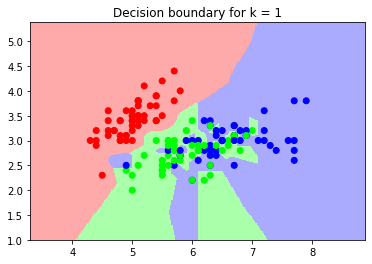

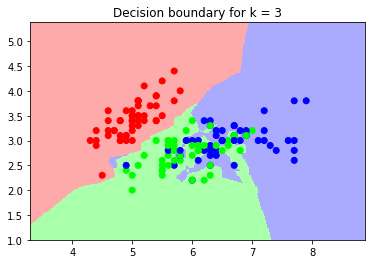

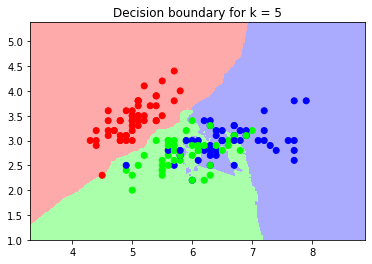

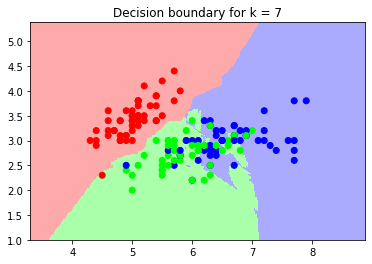

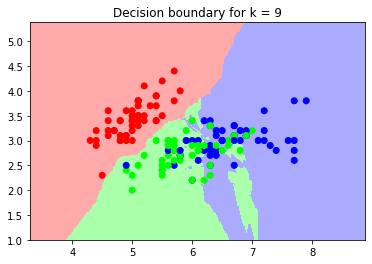

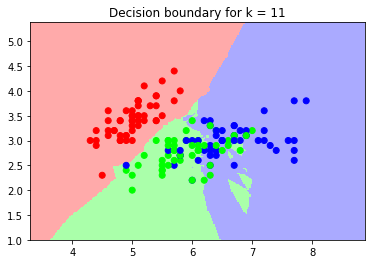

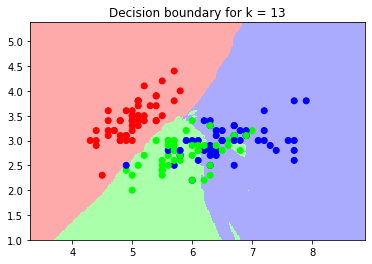

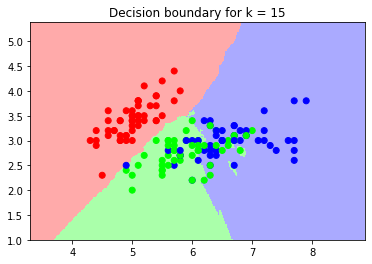

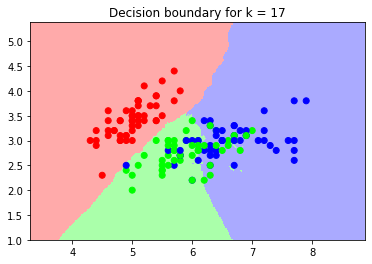

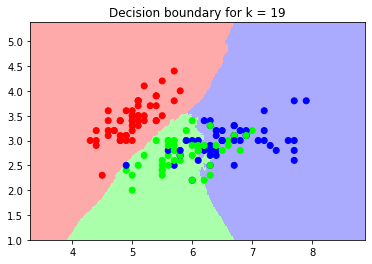

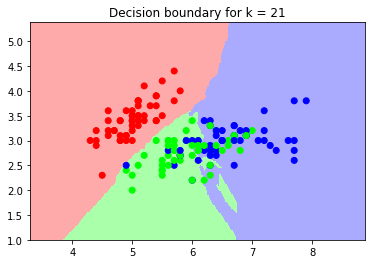

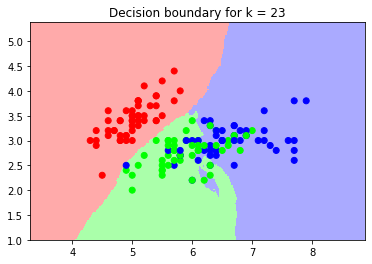

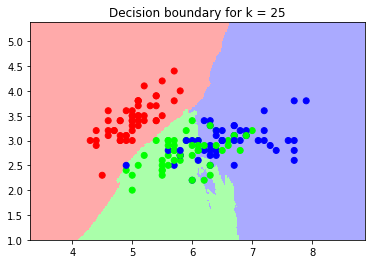

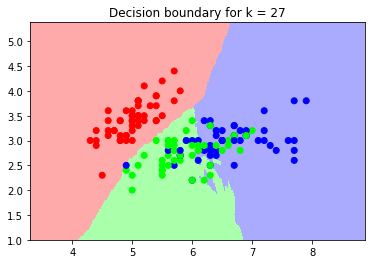

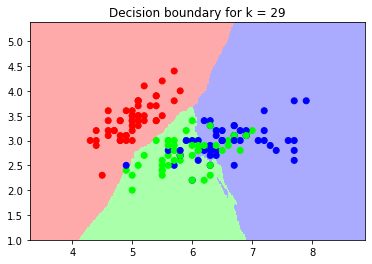

In [ ]:
for k in k_list:
    decision_boundary(k)

__Task 1__

In [ ]:
# 1. Function to estimate minkowski and manhattan distances
# minkowski distance is the Lp norm of 2 vectors
def minkowski_distance(a,b,p=3):
    a = np.array(a).
    b = np.array(b)
    dist = np.sum(np.abs(a-b)**p)**(1/p)
    if p == 1:   
      dist_type = 'Manhattan'
    if p == 2:
      dist_type = 'Euclidean'
    if p == 3:
      dist_type = 'Minkowski'
    return (dist, dist_type)

In [ ]:
a = [1,2,3,4,5]
b = [4,7,1,2,3]
dist, dist_type = minkowski_distance(a,b,3)
print(dist,dist_type)

5.604078661310774 Minkowski


For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 96.67% 
For k = 5, Accuracy 96.67% 
For k = 7, Accuracy 96.67% 
For k = 9, Accuracy 96.67% 
For k = 11, Accuracy 96.67% 
For k = 13, Accuracy 96.67% 
For k = 15, Accuracy 96.67% 
For k = 17, Accuracy 100.00% 
For k = 19, Accuracy 100.00% 
For k = 21, Accuracy 100.00% 
For k = 23, Accuracy 96.67% 
For k = 25, Accuracy 96.67% 
For k = 27, Accuracy 96.67% 
For k = 29, Accuracy 93.33% 


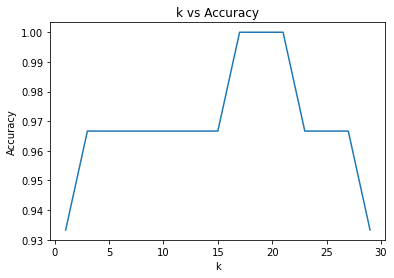

In [ ]:
# use the same k values for new distances to get the accuracy
# manhattan?
accuracy_list = []
k_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbors, pred_label = fit(test_instance,X_train,y_train,k,1)
        y_pred.append(pred_label)
    acc = accuracy(y_pred,y_test)
    print("For k = {}, Accuracy {:2.2%} ".format(k,acc))
    accuracy_list.append(acc)

plt.plot(k_list,accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 93.33% 
For k = 5, Accuracy 93.33% 
For k = 7, Accuracy 96.67% 
For k = 9, Accuracy 96.67% 
For k = 11, Accuracy 100.00% 
For k = 13, Accuracy 100.00% 
For k = 15, Accuracy 100.00% 
For k = 17, Accuracy 96.67% 
For k = 19, Accuracy 96.67% 
For k = 21, Accuracy 96.67% 
For k = 23, Accuracy 96.67% 
For k = 25, Accuracy 96.67% 
For k = 27, Accuracy 96.67% 
For k = 29, Accuracy 96.67% 


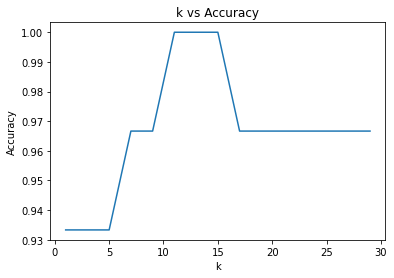

In [ ]:
# minkowski p = 3
accuracy_list = []
k_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbors, pred_label = fit(test_instance,X_train,y_train,k,3)
        y_pred.append(pred_label)
    acc = accuracy(y_pred,y_test)
    print("For k = {}, Accuracy {:2.2%} ".format(k,acc))
    accuracy_list.append(acc)

plt.plot(k_list,accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

# changes as p varies but trends cannot be generalized and performance depends on the shape of input data

__Task2__

For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 96.67% 
For k = 5, Accuracy 96.67% 
For k = 7, Accuracy 96.67% 
For k = 9, Accuracy 96.67% 
For k = 11, Accuracy 96.67% 
For k = 13, Accuracy 96.67% 
For k = 15, Accuracy 96.67% 
For k = 17, Accuracy 96.67% 
For k = 19, Accuracy 100.00% 
For k = 21, Accuracy 100.00% 
For k = 23, Accuracy 96.67% 
For k = 25, Accuracy 96.67% 
For k = 27, Accuracy 96.67% 
For k = 29, Accuracy 93.33% 


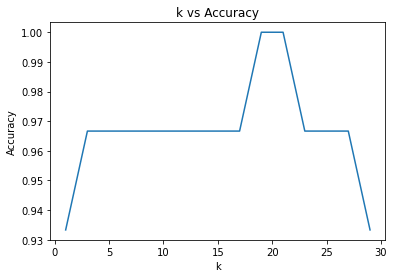

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

#dist = DistanceMetric.get_metric('euclidean')
acc_list = []
for k in k_list:

    neigh = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski')
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy(y_pred,y_test)
    print("For k = {}, Accuracy {:2.2%} ".format(k,acc))
    acc_list.append(acc)

plt.plot(k_list, acc_list)  
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()



__Task 3__

In [ ]:
# Seperate the training points into 2 equal subsets
X_train_1 = X_train[0:int((X_train.shape[0]/2)),:]
X_train_2 = X_train[int((X_train.shape[0]/2)):,:]
y_train_1 = y_train[0:int(len(y_train)/2)]
y_train_2 = y_train[int(len(y_train)/2):]


In [ ]:
def compute_accuracy_fk(X,y,y_test,k_list):
  acc_list = []
  for k in k_list:
    y_pred = []
    for test_instance in X_test: 
        neighbors, pred_label = fit(test_instance, X,y,k,2)
        y_pred.append(pred_label)
    acc = accuracy(y_pred,y_test)
    print("For k = {}, Accuracy {:2.2%} ".format(k,acc))
  
    acc_list.append(acc)
  plt.plot(k_list, acc_list)  
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.title('k vs Accuracy')
  plt.show()


first half:
For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 90.00% 
For k = 5, Accuracy 90.00% 
For k = 7, Accuracy 93.33% 
For k = 9, Accuracy 93.33% 
For k = 11, Accuracy 93.33% 
For k = 13, Accuracy 93.33% 
For k = 15, Accuracy 93.33% 
For k = 17, Accuracy 93.33% 
For k = 19, Accuracy 93.33% 
For k = 21, Accuracy 93.33% 
For k = 23, Accuracy 76.67% 
For k = 25, Accuracy 80.00% 
For k = 27, Accuracy 80.00% 
For k = 29, Accuracy 76.67% 


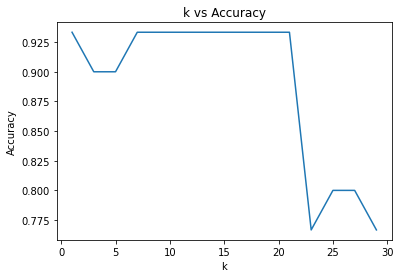

second half:
For k = 1, Accuracy 93.33% 
For k = 3, Accuracy 96.67% 
For k = 5, Accuracy 96.67% 
For k = 7, Accuracy 96.67% 
For k = 9, Accuracy 96.67% 
For k = 11, Accuracy 96.67% 
For k = 13, Accuracy 96.67% 
For k = 15, Accuracy 96.67% 
For k = 17, Accuracy 96.67% 
For k = 19, Accuracy 96.67% 
For k = 21, Accuracy 96.67% 
For k = 23, Accuracy 96.67% 
For k = 25, Accuracy 96.67% 
For k = 27, Accuracy 93.33% 
For k = 29, Accuracy 93.33% 


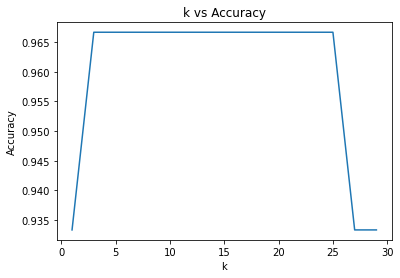

In [ ]:
print('first half:')
compute_accuracy_fk(X_train_1,y_train_1,y_test,k_list)
print('second half:')
compute_accuracy_fk(X_train_2,y_train_2,y_test,k_list)
